train_set: 140 
test_set: 35

Coefficients:  [[-0.03504866  0.01650602  0.00151998]]
Intercept:  [0.42865453]
Training MAE: 0.069, Test MAE: 0.061
Training MSE: 0.008, Test MSE: 0.005
Training RMSE: 0.088, Test RMSE: 0.073
Training R²: 0.626, Test R²: 0.699


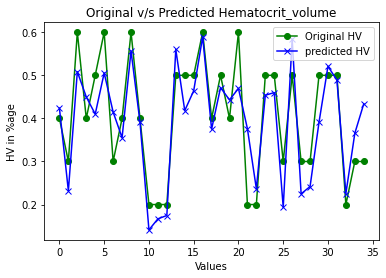

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
a = pd.read_csv('Data_1.csv')
a.head(10)


from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(a, test_size=0.2, random_state=0)
print(f"train_set: {len(train_set)} \ntest_set: {len(test_set)}\n")

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_set_x = np.asanyarray(train_set[['IP', 'TP', 'GC']])
train_set_y = np.asanyarray(train_set[['HV']])
test_set_x = np.asanyarray(test_set[['IP', 'TP', 'GC']])
test_set_y = np.asanyarray(test_set[['HV']])
regr.fit(train_set_x, train_set_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)





from sklearn import metrics
train_preds = regr.predict(train_set_x)
test_preds = regr.predict(test_set_x)


train_mae = metrics.mean_absolute_error(train_set_y, train_preds)
test_mae = metrics.mean_absolute_error(test_set_y, test_preds)

train_mse = metrics.mean_squared_error(train_set_y, train_preds)
test_mse = metrics.mean_squared_error(test_set_y, test_preds)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = metrics.r2_score(train_set_y, train_preds)
test_r2 = metrics.r2_score(test_set_y, test_preds)

print(f"Training MAE: {train_mae:.3f}, Test MAE: {test_mae:.3f}")
print(f"Training MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")
print(f"Training RMSE: {train_rmse:.3f}, Test RMSE: {test_rmse:.3f}")
print(f"Training R²: {train_r2:.3f}, Test R²: {test_r2:.3f}")

import matplotlib.pyplot as plt
plt.plot(test_set_y, 'g', label = "Original HV", marker='o')
plt.plot(test_preds, 'b', label = "predicted HV", marker = 'x')
plt.title("Original v/s Predicted Hematocrit_volume")
plt.xlabel('Values')
plt.ylabel('HV in %age')
plt.legend()
plt.show()



In [3]:
# View the default hyperparameters of the XGBoost model
print("Model Hyperparameters:", regr.get_params())


Model Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [ ]:
import numpy as np

# Assuming 'y_test' are the actual values and 'y_pred' are the predicted values
y_test = np.array([test_set_y])  # Replace with actual test set
y_pred = np.array([test_preds])  # Replace with your model's predictions

# Margin of Deviation
margin_of_deviation = np.abs(y_test - y_pred)

# Relative Error (in percentage)
relative_error = (margin_of_deviation / y_test) * 100

# Print results
print("Margin of Deviation:", margin_of_deviation)
print("Relative Error (%):", relative_error)

#average
print("Average value of Margin of Deviation:", np.mean(margin_of_deviation))
print("Average value of Relative Error (%):", np.mean(relative_error))

## K-fold cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
data = pd.read_csv("data_1.csv")
X = data.drop('HV', axis =1)
y = data['HV']

# k-fold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# model 
model = linear_model.LinearRegression()

#Perform k-fold cross-validate
# For R-squared Error
cv_results = cross_val_score(model, X, y, cv=kf, scoring='r2')
mean_r2 = np.mean(cv_results)
std_r2 = np.std(cv_results)

# For mean squared error
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
# Convert negative MSE to positive MSE
cv_scores = -cv_scores
mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

# for Root mean squared error
cv_rmse_scores = np.sqrt(cv_scores)
mean_rmse = np.mean(cv_rmse_scores)
std_rmse = np.std(cv_rmse_scores)

print(f'Cross-Validated R²: {mean_r2:.2f} ± {std_r2:.2f}')
print(f'Cross-Validated MSE: {mean_mse:.2f} ± {std_mse:.2f}')
print(f'Cross-Validated RMSE: {mean_rmse:.2f} ± {std_rmse:.2f}')

## Confidence Interval

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of bootstrap samples
n_iterations = 1000
n_size = int(len(X_train) * 0.8)

# Arrays to store bootstrap predictions
bootstrap_preds = np.zeros((n_iterations, len(X_test)))

# Perform bootstrapping
for i in range(n_iterations):
    # Resample the data
    X_resample, y_resample = resample(X_train, y_train, n_samples=n_size, random_state=i)
    
    # Train model
    model = linear_model.LinearRegression()
    model.fit(X_resample, y_resample)
    
    # Predict on the test set
    bootstrap_preds[i, :] = model.predict(X_test)

# Calculate the mean and standard deviation of the predictions
mean_preds = np.mean(bootstrap_preds, axis=0)
std_preds = np.std(bootstrap_preds, axis=0)

# Define confidence level
confidence_level = 0.95
z_score = 1.96  # For 95% confidence

# Calculate the confidence intervals
lower_bound = mean_preds - z_score * std_preds
upper_bound = mean_preds + z_score * std_preds

# Print the confidence intervals for the first 5 test predictions
for i in range(5):
    print(f"Prediction: {mean_preds[i]:.2f}, Confidence Interval: [{lower_bound[i]:.2f}, {upper_bound[i]:.2f}]")


import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(len(mean_preds)), mean_preds, 'b', label='Mean Prediction')
plt.fill_between(range(len(mean_preds)), lower_bound, upper_bound, color='orange', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted HV')
plt.title('Predictions with 95% Confidence Intervals')
plt.legend()
plt.show()